# Task: Prediction using Decision Tree Algorithm

# Notebook setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [2]:
sns.set()

# Load data from CSV

In [ ]:
csv_file = "iris.csv"

In [205]:
columns = ['ID', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']

### Create a Pandas dataframe from data

In [206]:
df = pd.read_csv(csv_file, header=None, skiprows=1, usecols=range(1, 6), names=columns)

In [207]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# What problem are we trying to solve?

We are trying to use the 4 attributes of the flowers to prdict the species of the flower. We are trying to use the sepal length and width and the petal length and width to predict if an iris flower is of type _Setosa_, _Versicolor_, or _Virginica_.

This is a multiclass classifiction problem.

# Basic descriptive statistics

In [43]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [210]:
print(df['class'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


# Distribution of features and targets

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

<Figure size 720x360 with 0 Axes>

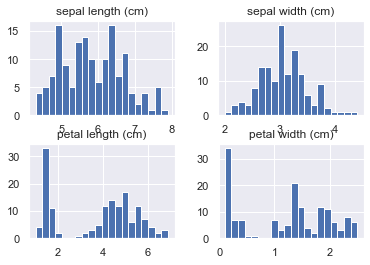

In [211]:
plt.figure(figsize=(10, 5))
df.hist(bins=20, grid=True)

# Relationship of the data features with the target

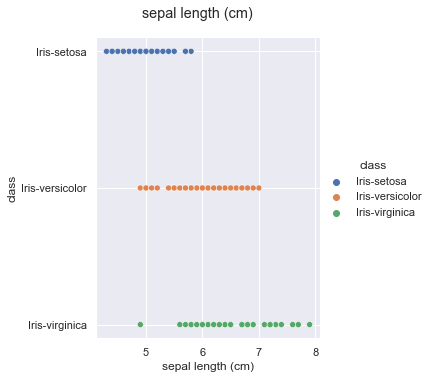

In [212]:
col = 'sepal length (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

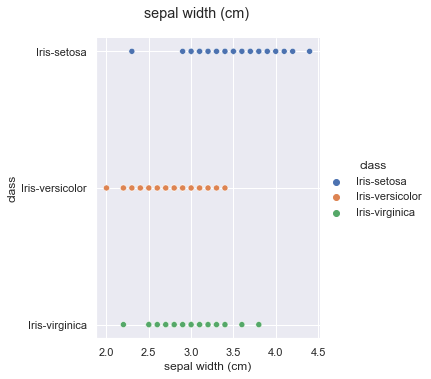

In [214]:
col = 'sepal width (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

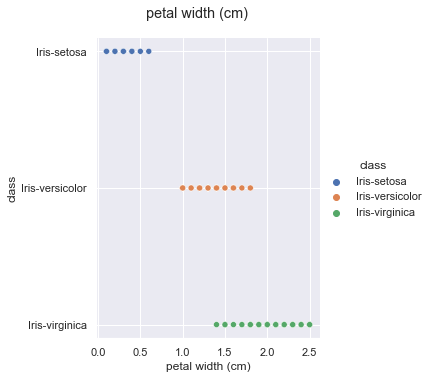

In [215]:
col = 'petal width (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

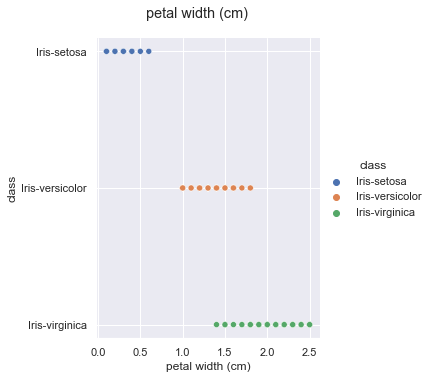

In [216]:
col = 'petal width (cm)'
sns.relplot(x=col, y='class', hue='class', data=df)
_ = plt.suptitle(col, y=1.05)

# Exploratory Data Analysis(EDA) - Pairplots

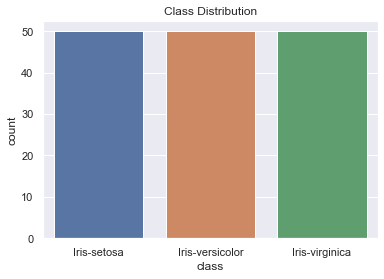

In [217]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

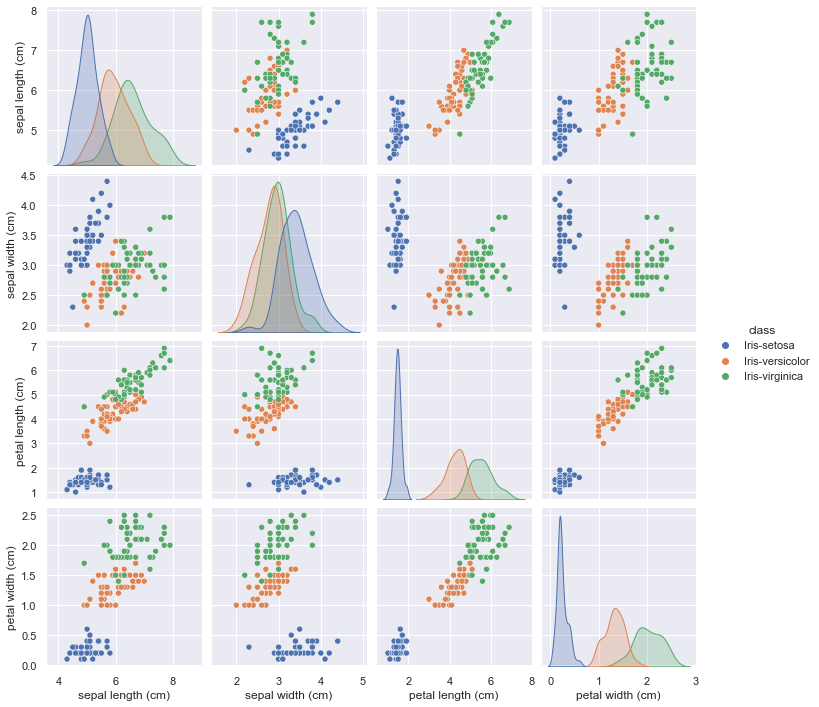

In [218]:
sns.pairplot(df, hue="class")
plt.show()

# Train Test Split

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [221]:
df_train.shape

(112, 5)

In [222]:
df_test.shape

(38, 5)

In [223]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
128,6.4,2.8,5.6,2.1,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
35,5.0,3.2,1.2,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa


Prepare our data for modeling

In [224]:
x_train = df_train.drop(columns=['class']).values

In [225]:
y_train = df_train['class'].values

# Modeling - Decision Tree Classifier

In [226]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [227]:
model = DecisionTreeClassifier(random_state=42)

# Using validation set to evaluate our model

In [228]:
# x stands for "x_train" and xv stands for "x_validation"
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [229]:
 model.fit(xt, yt)

DecisionTreeClassifier(random_state=42)

In [230]:
y_pred = model.predict(xv)

In [231]:
np.mean(y_pred == yv)

0.9642857142857143

In [232]:
model.score(x_train, y_train)

0.9910714285714286

In [233]:
model.score(xv, yv)

0.9642857142857143

# Using cross-validation to evaluate our model

In [234]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict  # Add cross_val_score import

In [235]:
model = DecisionTreeClassifier(random_state=42)

In [236]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")

In [237]:
np.mean(accuracies)

0.9553359683794467

# Where are we misclassifying points?

In [238]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)

In [239]:
predicted_correctly_mask = y_pred == y_train

In [240]:
not_predicted_correctly = ~predicted_correctly_mask

In [241]:
x_train[not_predicted_correctly]

array([[6. , 2.2, 5. , 1.5],
       [7.2, 3. , 5.8, 1.6],
       [6.9, 3.1, 4.9, 1.5],
       [6.7, 3. , 5. , 1.7],
       [6.3, 2.5, 4.9, 1.5]])

In [177]:
class_name = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [242]:
class_name_to_id = {name: i for i, name in enumerate(class_name)}
y_train_ids = np.array([class_name_to_id[name] for name in y_train])
y_pred_ids = np.array([class_name_to_id[name] for name in y_pred])

In [243]:
df_predictions = df_train.copy()

In [244]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [245]:
df_predictions["prediction"] = y_pred_ids

In [246]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0: class_name[0], 1: class_name[1], 2: class_name[2]})

In [247]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,correct_prediction,prediction,prediction_label
128,6.4,2.8,5.6,2.1,Iris-virginica,True,2,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor,True,1,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica,True,2,Iris-virginica
35,5.0,3.2,1.2,0.2,Iris-setosa,True,0,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa,True,0,Iris-setosa


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

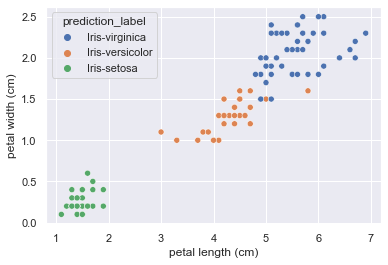

In [248]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="prediction_label", data=df_predictions)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

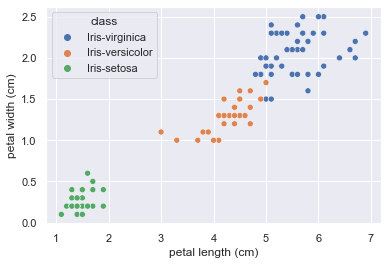

In [269]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="class", data=df_predictions)

# Plotting the incorrectly classified points

In [270]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10)) 
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="class", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

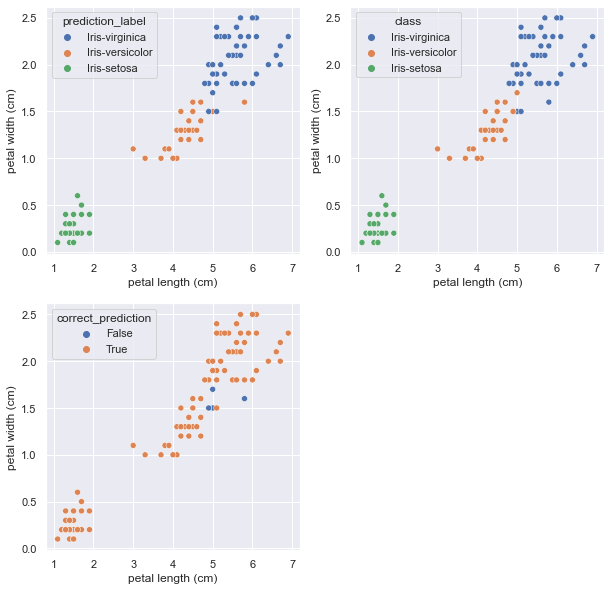

In [271]:
plot_incorrect_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

# Model Tuning

In [272]:
for max_depth in [None, 1, 10, 15,100,]:
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
    print(f"Max Depth: {max_depth}, Mean Accuracy: {np.mean(accuracies) * 100:.2f}%")

Max Depth: None, Mean Accuracy: 95.53%
Max Depth: 1, Mean Accuracy: 71.38%
Max Depth: 10, Mean Accuracy: 95.53%
Max Depth: 15, Mean Accuracy: 95.53%
Max Depth: 100, Mean Accuracy: 95.53%


# Final model

In [273]:
model = DecisionTreeClassifier(random_state=42, max_depth=None)

In [274]:
x_test = df_test.drop(columns=['class']).values
y_test = df_test['class'].values

# Model Tuning using GridSearchCV

In [275]:
from sklearn.model_selection import GridSearchCV

### Define the hyperparameters to be tuned

In [276]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Create GridSearchCV object

In [277]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

### Fit the model to find the best hyperparameters


In [278]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### Print the best hyperparameters

In [279]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_ * 100)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 96.40316205533598


# Train the final model using the full dataset

In [280]:
# Use the best model from GridSearchCV for prediction
best_model = grid_search.best_estimator_

In [281]:
y_test_pred = best_model.predict(x_test)

In [282]:
test_set_correctly_classified = y_test_pred == y_test

In [283]:
test_set_accuracy = np.mean(test_set_correctly_classified)
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}%")

Test set accuracy: 92.11%


# Conclusion

In [284]:
print(f"Decision Tree Classifier achieved an accuracy of {test_set_accuracy * 100:.2f}% on the test dataset.")

Decision Tree Classifier achieved an accuracy of 92.11% on the test dataset.


In [290]:
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_result)

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.78      0.88      0.82         8

       accuracy                           0.92        38
      macro avg       0.91      0.92      0.91        38
   weighted avg       0.93      0.92      0.92        38

Confusion Matrix:
 [[12  0  0]
 [ 0 16  2]
 [ 0  1  7]]


In [294]:
# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42, max_depth=3)

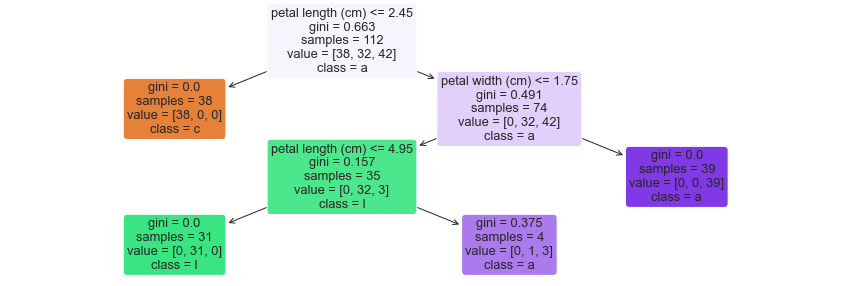

In [295]:
# Fit the model on the training data
best_model.fit(x_train, y_train)

# Visualize the Decision Tree graphically
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 5))
plot_tree(best_model, feature_names=df.columns[:-1], class_names='class', filled=True, rounded=True)
plt.show()